# Lab 6.01 - Regression analysis


In [3]:
# Package imports
import numpy as np  # "Scientific computing"
import scipy.stats as stats  # Statistical tests

import pandas as pd  # Dataframe
import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns  # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).

1. Import the dataset `Cats.csv`.


In [4]:
cats = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv"
)


# Show the first few records of the Data Frame


cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


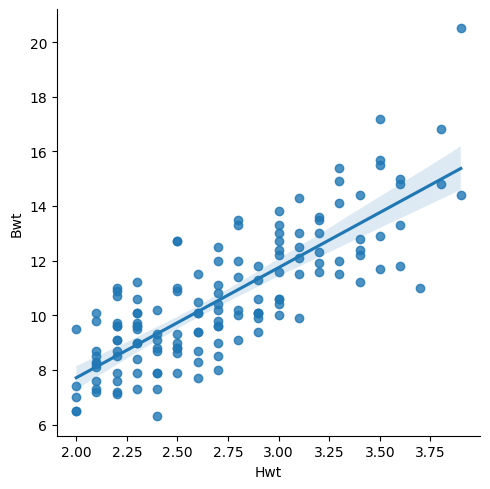

In [5]:
sns.lmplot(data=cats, x="Hwt", y="Bwt")

3. Calculate and draw the regression line.


In [6]:
least_squares = pd.DataFrame({"x": cats.Hwt, "y": cats.Bwt})


mx = least_squares.x.mean()


my = least_squares.y.mean()

least_squares["(x-x̄)"] = least_squares["x"] - mx
least_squares["(y-ȳ)"] = least_squares["y"] - my


least_squares["(x-x̄)(y-ȳ)"] = least_squares["(x-x̄)"] * least_squares["(y-ȳ)"]


least_squares["(x-x̄)²"] = least_squares["(x-x̄)"] ** 2
least_squares

,x,y,(x-x̄),(y-ȳ),(x-x̄)(y-ȳ),(x-x̄)²
0,2.0,7.0,-0.723611,-3.629861,2.626608,0.523613
1,2.0,7.4,-0.723611,-3.229861,2.337163,0.523613
2,2.0,9.5,-0.723611,-1.129861,0.817580,0.523613
3,2.1,7.2,-0.623611,-3.429861,2.138899,0.388891
4,2.1,7.3,-0.623611,-3.329861,2.076538,0.388891
...,...,...,...,...,...,...
139,3.7,11.0,0.976389,0.370139,0.361399,0.953335
140,3.8,14.8,1.076389,4.170139,4.488691,1.158613
141,3.8,16.8,1.076389,6.170139,6.641469,1.158613
142,3.9,14.4,1.176389,3.770139,4.435149,1.383891


In [7]:
# Numerator and denomitator of the formula for b_0:
num = sum(least_squares["(x-x̄)(y-ȳ)"])
denom = sum(least_squares["(x-x̄)²"])
beta1 = num / denom
beta0 = my - beta1 * mx

print(f"beta_1 = {num:.4f} / {denom:.4f} = {beta1:.4f}")
print(f"beta_0 = {my:.4f} - {beta1:.4f} * {mx:.4f} = {beta0:.4f}")
print(f"ŷ = {beta0:.4f} + {beta1:.4f} x")

beta_1 = 135.7885 / 33.6797 = 4.0318
beta_0 = 10.6299 - 4.0318 * 2.7236 = -0.3511
ŷ = -0.3511 + 4.0318 x


<Axes: xlabel='Hwt', ylabel='Bwt'>

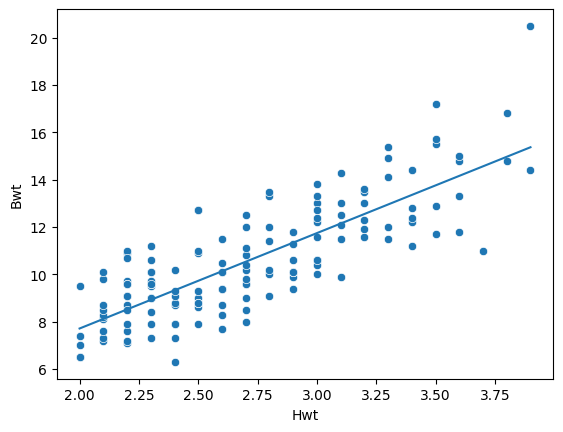

In [8]:
import math

xmin = cats["Hwt"].min()
xmax = cats["Hwt"].max()
x_values = [xmin, xmax]
ymin = cats["Bwt"].min()
ymax = cats["Bwt"].max()
y_values = [beta1 * x_values[0] + beta0, beta1 * x_values[1] + beta0]

sns.lineplot(x=x_values, y=y_values)
sns.scatterplot(x=cats.Hwt, y=cats.Bwt)

4. Calculate the correlation coefficient and the coefficient of determination.


In [9]:
r = np.corrcoef(cats.Hwt, cats.Bwt)[0, 1]

print(f"R : {r:.4f}")
print(f"R²: {r**2:.4f}")

R : 0.8041
R²: 0.6466


In [10]:
cats[["Hwt", "Bwt"]].corr()

,Hwt,Bwt
Hwt,1.000000,0.804135
Bwt,0.804135,1.000000


5. Interpret the results from the previous steps.


### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [11]:
cats = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv"
)


# Show the first few records of the Data Frame


cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


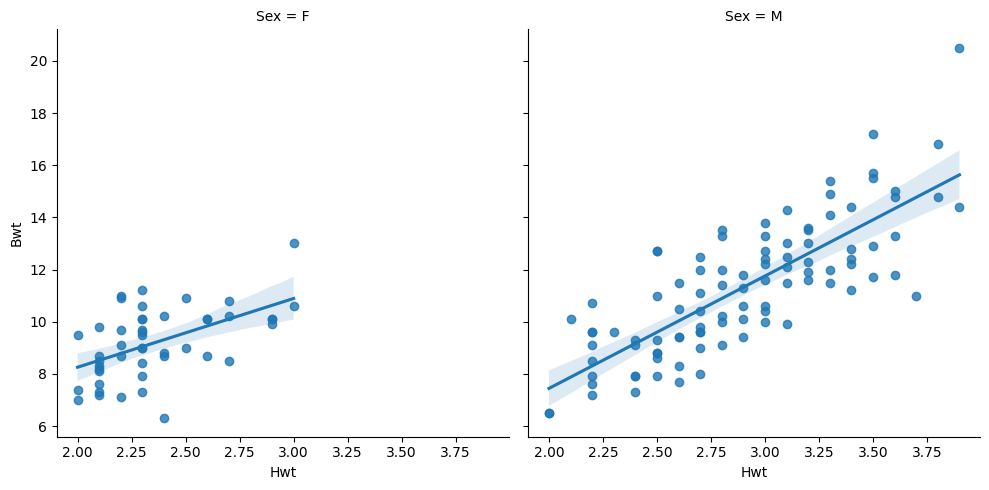

In [12]:
sns.lmplot(data=cats, x="Hwt", y="Bwt", col="Sex")

3. Calculate and draw the regression line.


4. Calculate the correlation coefficient and the coefficient of determination.


5. Interpret the results from the previous steps.


### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
